In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler


In [2]:
print("Step 1: Data Loading and Preprocessing...")

df = pd.read_csv('Dataset.csv')

# Remove missing cuisine rows
df.dropna(subset=['Cuisines'], inplace=True)

# Extract only the first cuisine
df['Main_Cuisine'] = df['Cuisines'].apply(lambda x: x.split(',')[0].strip())

df[['Cuisines', 'Main_Cuisine']].head()


Step 1: Data Loading and Preprocessing...


,Cuisines,Main_Cuisine
0,"French, Japanese, Desserts",French
1,Japanese,Japanese
2,"Seafood, Asian, Filipino, Indian",Seafood
3,"Japanese, Sushi",Japanese
4,"Japanese, Korean",Japanese


In [3]:
print("\nStep 2: Feature Engineering and Splitting...")

# Select top 20 most frequent cuisines
top_20_cuisines = df['Main_Cuisine'].value_counts().nlargest(20).index.tolist()
df_filtered = df[df['Main_Cuisine'].isin(top_20_cuisines)].copy()

print("Top 20 cuisines kept for classification:")
print(top_20_cuisines)



Step 2: Feature Engineering and Splitting...
Top 20 cuisines kept for classification:
['North Indian', 'Chinese', 'Fast Food', 'Bakery', 'Cafe', 'American', 'South Indian', 'Mithai', 'Street Food', 'Continental', 'Italian', 'Pizza', 'Mughlai', 'Ice Cream', 'Desserts', 'Burger', 'Biryani', 'Raw Meats', 'Beverages', 'Finger Food']


In [4]:
X = df_filtered[['Country Code', 'City', 'Average Cost for two', 'Price range', 
                 'Has Table booking', 'Has Online delivery', 'Is delivering now', 
                 'Rating color', 'Votes', 'Longitude', 'Latitude']]

y = df_filtered['Main_Cuisine']

# Define feature types
numerical_features = ['Average Cost for two', 'Price range', 'Votes', 'Longitude', 'Latitude']
categorical_features = ['Country Code', 'City', 'Has Table booking', 
                        'Has Online delivery', 'Is delivering now', 'Rating color']


In [5]:
# Convert categorical features into dummy variables
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)


In [6]:
print("\nStep 3: Model Training and Evaluation (Logistic Regression)...")

# Scale numeric features
numerical_cols_encoded = [col for col in X_train.columns if col in numerical_features]

scaler = StandardScaler()
X_train_lr = X_train.copy()
X_test_lr = X_test.copy()
X_train_lr[numerical_cols_encoded] = scaler.fit_transform(X_train_lr[numerical_cols_encoded])
X_test_lr[numerical_cols_encoded] = scaler.transform(X_test_lr[numerical_cols_encoded])

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')
lr_model.fit(X_train_lr, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_lr)

# Accuracy & Report
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr, zero_division=0)

print(f"\nOverall Accuracy (Logistic Regression): {accuracy_lr:.4f}")
print("\nClassification Report (Logistic Regression):")
print(report_lr)



Step 3: Model Training and Evaluation (Logistic Regression)...

Overall Accuracy (Logistic Regression): 0.3721

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

    American       0.45      0.45      0.45        56
      Bakery       0.13      0.02      0.03       124
   Beverages       0.00      0.00      0.00        16
     Biryani       0.00      0.00      0.00        22
      Burger       0.00      0.00      0.00        23
        Cafe       0.29      0.12      0.17       123
     Chinese       0.00      0.00      0.00       171
 Continental       0.00      0.00      0.00        47
    Desserts       0.00      0.00      0.00        30
   Fast Food       0.33      0.01      0.01       135
 Finger Food       0.00      0.00      0.00        16
   Ice Cream       1.00      0.03      0.05        36
     Italian       0.00      0.00      0.00        47
      Mithai       0.00      0.00      0.00        49
     Mughlai       0.00      0.

In [7]:
print("\nStep 4: Model Training and Evaluation (Random Forest)...")

# Train Random Forest (no scaling needed)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy & Report
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, zero_division=0)

print(f"\nOverall Accuracy (Random Forest): {accuracy_rf:.4f}")
print("\nClassification Report (Random Forest):")
print(report_rf)



Step 4: Model Training and Evaluation (Random Forest)...

Overall Accuracy (Random Forest): 0.3310

Classification Report (Random Forest):
              precision    recall  f1-score   support

    American       0.34      0.32      0.33        56
      Bakery       0.18      0.17      0.18       124
   Beverages       0.00      0.00      0.00        16
     Biryani       0.00      0.00      0.00        22
      Burger       0.09      0.04      0.06        23
        Cafe       0.33      0.27      0.30       123
     Chinese       0.21      0.16      0.18       171
 Continental       0.11      0.04      0.06        47
    Desserts       0.10      0.07      0.08        30
   Fast Food       0.18      0.15      0.16       135
 Finger Food       0.14      0.12      0.13        16
   Ice Cream       0.19      0.17      0.18        36
     Italian       0.09      0.04      0.06        47
      Mithai       0.24      0.22      0.23        49
     Mughlai       0.11      0.05      0.07      

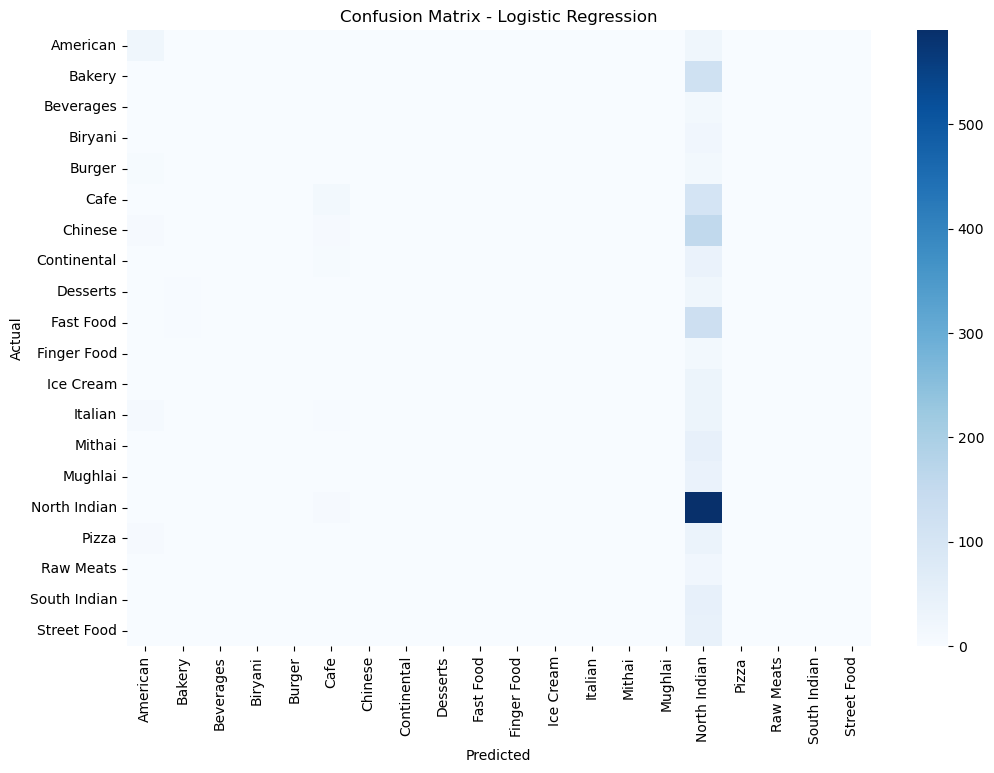

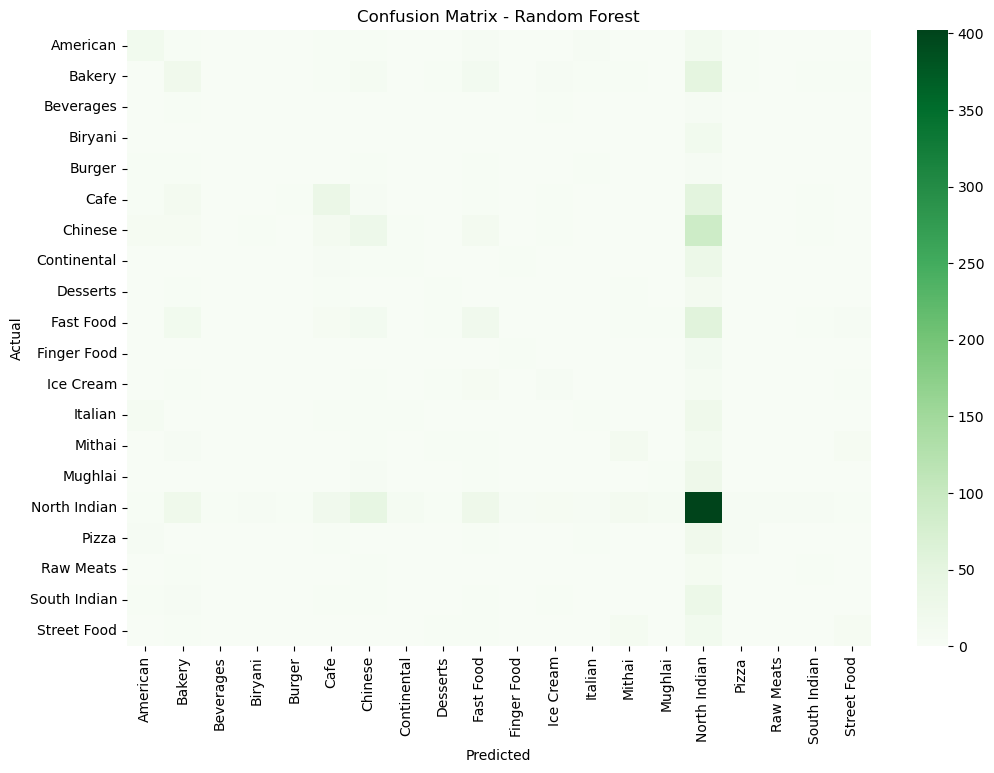

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=lr_model.classes_)
plt.figure(figsize=(12, 8))
sns.heatmap(cm_lr, annot=False, fmt="d", cmap="Blues",
            xticklabels=lr_model.classes_,
            yticklabels=lr_model.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_model.classes_)
plt.figure(figsize=(12, 8))
sns.heatmap(cm_rf, annot=False, fmt="d", cmap="Greens",
            xticklabels=rf_model.classes_,
            yticklabels=rf_model.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


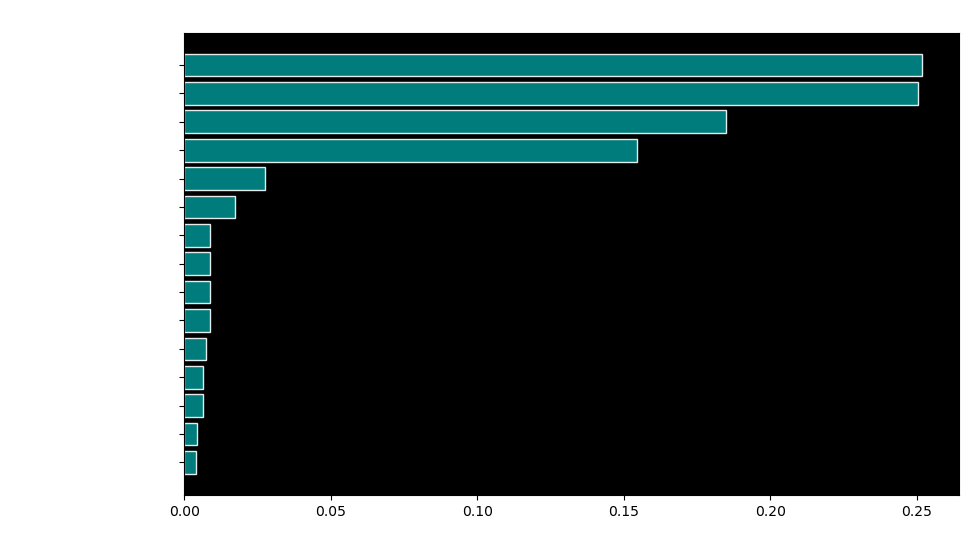

In [9]:
import numpy as np  # <-- Fix: Import NumPy

# Feature Importance for Random Forest (dark theme)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-15:]  # top 15 features

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], 
         color="darkcyan", alpha=0.9, edgecolor="white")
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices], color="white")
plt.xlabel("Feature Importance Score", color="white")
plt.title("Top 15 Important Features - Random Forest", fontsize=14, weight="bold", color="white")
plt.gca().set_facecolor("black")  # dark background for plot
plt.show()
